# Stochastic Analysis

## load tables

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
agents_number_df = pd.read_csv('./agents_results.csv')
agents_number_df = agents_number_df.drop_duplicates(subset='damage')
agents_number_df = agents_number_df.loc[(agents_number_df['num_agents'] <= 500) & (agents_number_df['num_agents'] >= 100) &(agents_number_df['d'] == 5) & (agents_number_df['sigma'] == 1) & (agents_number_df['f'] == 1.2)]
agents_number_df = agents_number_df.groupby(['planner', 'num_agents'], as_index=False).mean()
agents_number_df.head()

In [3]:
f_df = pd.read_csv('./f_results.csv')
f_df = f_df.drop_duplicates(subset='damage')
f_df = f_df.loc[(f_df['num_agents'] == 300) & (f_df['f'] < 2.1)]
f_df = f_df.groupby(['planner', 'f'], as_index=False).mean()
f_df.head()

,planner,f,num_agents,num_robots,d,sigma,active_time,planner_time,damage,num_disabled
0,StochasticAdditiveLackPlanner,1.5,300.0,5.0,5.0,1.0,270.276062,665.552661,71736.930662,116.50980
1,StochasticAdditiveLackPlanner,1.6,300.0,5.0,5.0,1.0,255.663112,894.768436,69524.902180,125.90300
2,StochasticAdditiveLackPlanner,1.7,300.0,5.0,5.0,1.0,241.953160,964.862926,67336.205637,132.62360
3,StochasticAdditiveLackPlanner,1.8,300.0,5.0,5.0,1.0,233.415275,987.132130,65510.113788,139.74850
4,StochasticAdditiveLackPlanner,1.9,300.0,5.0,5.0,1.0,222.656492,1011.817384,63734.306870,140.87825


In [4]:
robots_df = pd.read_csv('./robots_results.csv')
robots_df = robots_df.drop_duplicates(subset=['planner', 'damage'])
robots_df = robots_df.loc[(robots_df['f'] == 1.5)]
robots_df = robots_df.groupby(['planner', 'num_robots'], as_index=False).mean()
robots_df.head()

,planner,num_robots,num_agents,f,d,sigma,active_time,planner_time,damage,num_disabled
0,StochasticIterativePlanner,2,300.0,1.5,5.0,1.0,275.186345,1.522294,69089.898709,32.955
1,StochasticIterativePlanner,3,300.0,1.5,5.0,1.0,267.540872,1.779477,66925.894794,45.299
2,StochasticIterativePlanner,4,300.0,1.5,5.0,1.0,261.242169,2.176842,65393.962320,55.648
3,StochasticIterativePlanner,5,300.0,1.5,5.0,1.0,240.216426,2.362805,64004.893196,63.306
4,StochasticIterativePlanner,6,300.0,1.5,5.0,1.0,240.647679,2.687860,62082.478940,72.664


## visualizations

In [5]:
planners_colors = {'StochasticIterativePlanner': 'red',
                   'StochasticStaticLackPlanner': 'blue',
                   'StochasticAdditiveLackPlanner': 'orange',
                   'StochasticMonotone15LackPlanner': 'green',
                   'StochasticMonotone20LackPlanner': 'purple',
                   'StochasticMonotone30LackPlanner': 'olive',
                   'StochasticMonotone45LackPlanner': 'cyan'}

In [6]:
from typing import List

def visualize(X: List[str], Y: List[str], data, file_to_save: str, title: str):
    plt.figure(figsize=(14,10))
    plt.suptitle(title, fontsize=18)

    for i in range(len(Y)):
        x, y = X[i], Y[i]

        plt.subplot(2, 2, i+1)
        plt.xlabel(x)
        plt.ylabel(y)
        for j in range(len(data)):
            r = data[j]
            plt.plot(list(r[x]), list(r[y]), c=list(planners_colors.values())[j])

        if i==1:
            plt.legend(planners_colors.keys(), fontsize='14')

    plt.savefig(file_to_save)
    plt.show()

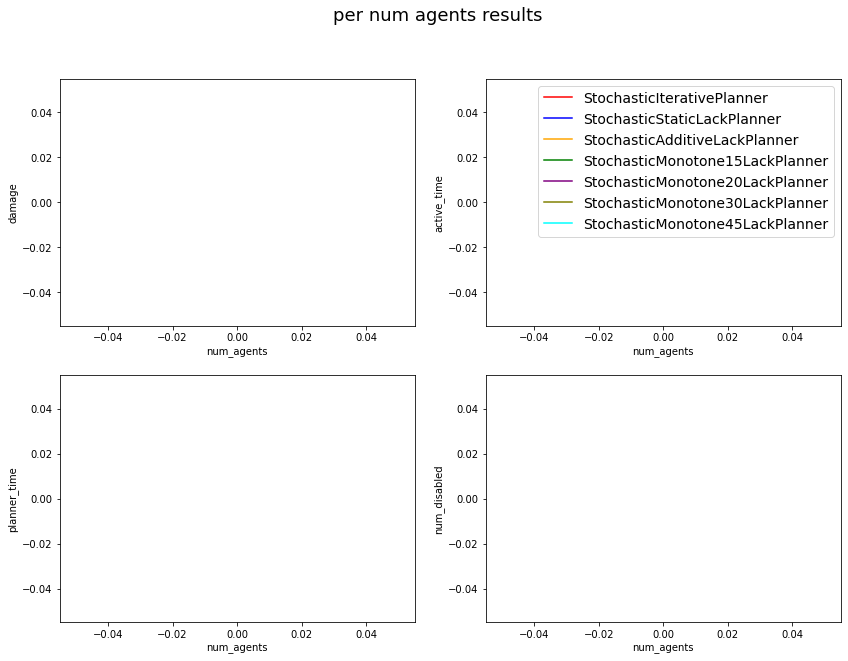

In [7]:
Y = ['damage', 'active_time', 'planner_time', 'num_disabled']
X = ['num_agents' for _ in Y]

agents_results = [agents_number_df.loc[agents_number_df['planner'] == name] for name in planners_colors.keys()]
title = 'per num agents results'
file_to_save = './plots/stochastic_num_agents.png'

visualize(X, Y, agents_results, file_to_save, title)

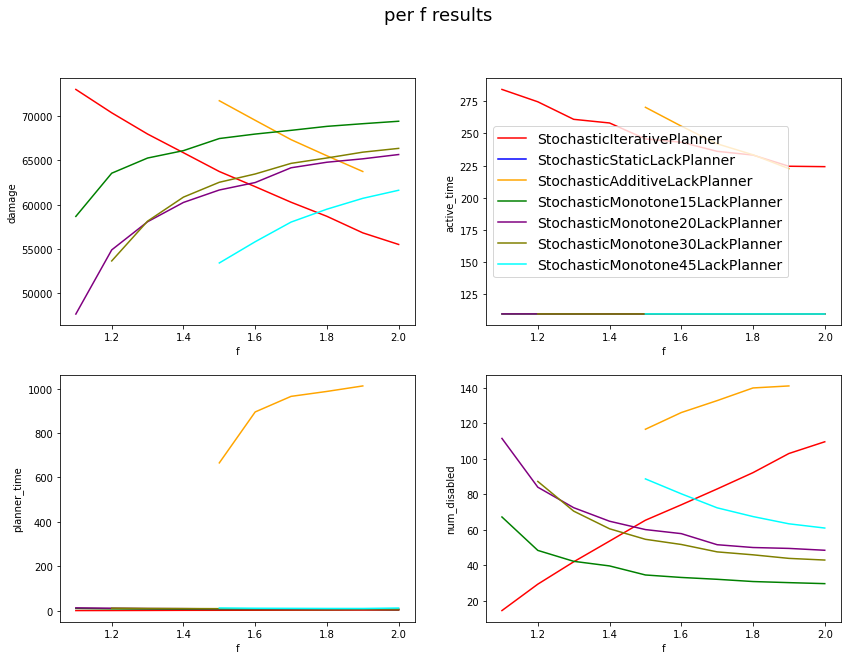

In [8]:
Y = ['damage', 'active_time', 'planner_time', 'num_disabled']
X = ['f' for _ in Y]

f_results = [f_df.loc[f_df['planner'] == name] for name in planners_colors.keys()]
title = 'per f results'
file_to_save = './plots/stochastic_f.png'

visualize(X, Y, f_results, file_to_save, title)

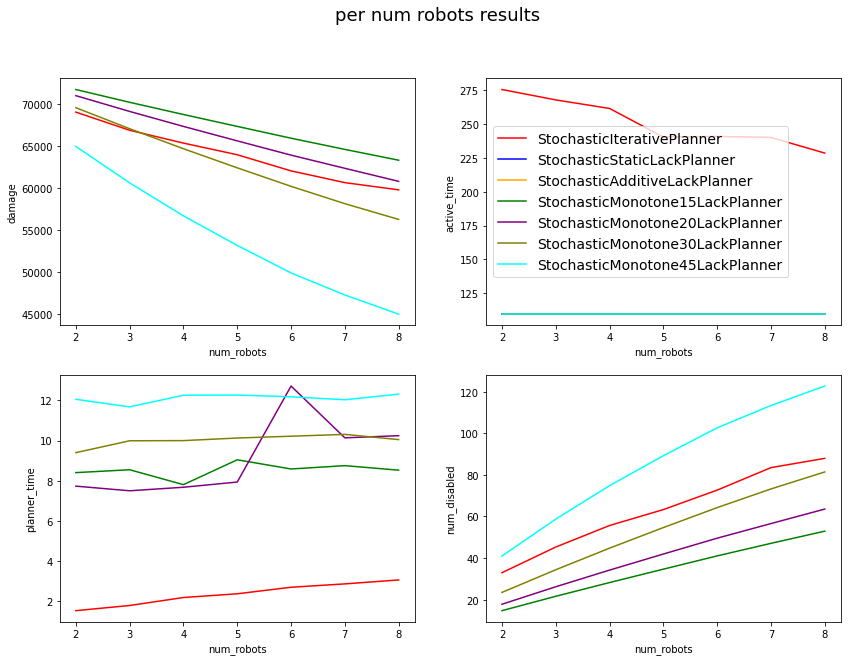

In [9]:
Y = ['damage', 'active_time', 'planner_time', 'num_disabled']
X = ['num_robots' for _ in Y]

robots_results = [robots_df.loc[robots_df['planner'] == name] for name in planners_colors.keys()]
title = 'per num robots results'
file_to_save = './plots/stochastic_num_robots.png'

visualize(X, Y, robots_results, file_to_save, title)

<AxesSubplot:title={'center':'damage'}, xlabel='planner'>

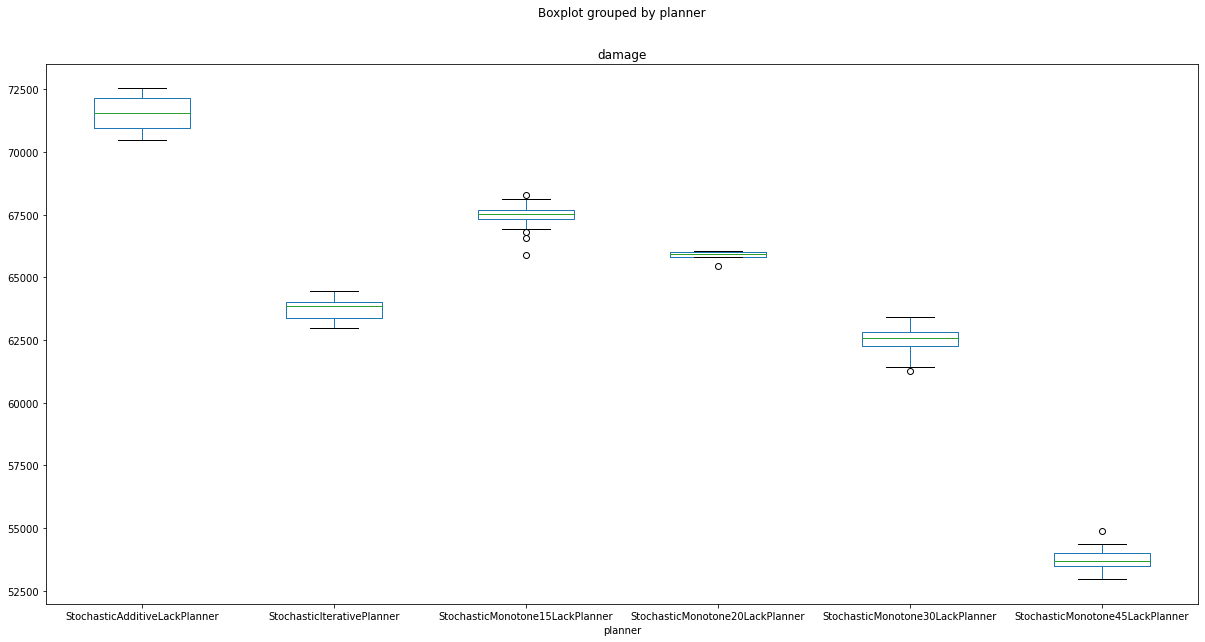

In [10]:
vat_df = pd.read_csv('./agents_results.csv')
vat_df = vat_df.drop_duplicates(subset='damage')
vat_df = vat_df.loc[(vat_df['num_agents'] == 300) & (vat_df['d'] == 5) & (vat_df['sigma'] == 1) & (vat_df['f'] == 1.5)]

vat_df.boxplot(by ='planner', column =['damage'], grid = False, figsize=(20,10))

## run experiments

### config file

In [11]:
import json
with open('config.json') as json_file:
    config = json.load(json_file)
config

{'x_size': 100,
 'y_size_init': 100,
 'y_size': 300,
 'x_buffer': 10,
 'y_buffer': 10,
 'num_robots': 5,
 'num_agents': 100,
 'agent_speed': 1,
 'robot_speed': 1.5,
 'disablement_range': 5,
 'sigma': 1}

In [12]:
import math
import time
from random import seed

from planners.stochastic.partial_blockage.stochastic_additive_lack_planner import StochasticAdditiveLackPlanner
from planners.stochastic.baseline.stochastic_iterative_planner import StochasticIterativePlanner

from planners.stochastic.partial_blockage.stochastic_monotone_lack_planner import StochasticMonotoneLackPlanner
from world.agents.stochastic_agent import StochasticAgent
from world.robots.timing_robot import TimingRobot
from world.stochastic_environment import StochasticEnvironment
from planners.planner import Planner
from planners.stochastic.partial_blockage.stochastic_static_lack_planner import StochasticStaticLackPlanner
from utils.functions import *

In [14]:
def run(planner: Planner, file_name: str):
    agents = [StochasticAgent(loc=sample_point(config['x_buffer'], config['x_buffer'] + config['x_size'],
                                               config['y_buffer'], config['y_buffer'] + config['y_size_init'], True),
                              v=config['agent_speed'], sigma=config['sigma']) for _ in range(config['num_agents'])]

    robots = [BasicRobot(sample_point(0, config['x_size'] + 2 * config['x_buffer'], 0, config['y_buffer'], True),
                         config['robot_speed'], config['disablement_range']) for _ in range(config['num_robots'])]

    env = StochasticEnvironment(agents=agents, robots=robots, top_border=config['y_size'] + config['y_buffer'],
                                right_border=config['x_size'] + config['x_buffer'], left_border=config['x_buffer'])

    before = time.time()
    _, active_time, expected_damage, expected_num_disabled = planner.plan(env)
    planning_time = time.time() - before

    write_report(planner=str(planner),
                 num_agents=config['num_agents'],
                 num_robots=config['num_robots'],
                 f=config['robot_speed'] / config['agent_speed'],
                 d=config['disablement_range'],
                 active_or_copmletion_time=active_time,
                 planner_time=planning_time,
                 damage=expected_damage,
                 num_disabled=expected_num_disabled,
                 file_name=file_name,
                 is_active_time=True,
                 sigma=config['sigma'])

In [17]:
planners = [StochasticMonotoneLackPlanner()]

config['robot_speed'] = 1.2

for planner in planners:
    for alpha in [math.pi / 4, math.pi / 9]:
        planner.alpha = alpha
        for v in tqdm([100,200,300,400,500]):
            print(f'*** *** v={v} *** ***')
            for s in range(5):
                seed(s)

                config['num_agents'] = v
                print(f'running {str(planner)} with seed {s}..')

                try:
                    run(planner, 'agents_results.csv')
                except:
                    print('passed')

 40%|████      | 2/5 [00:38<01:03, 21.28s/it]

*** *** v=300 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 60%|██████    | 3/5 [01:42<01:21, 40.69s/it]

*** *** v=400 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 80%|████████  | 4/5 [03:30<01:07, 67.27s/it]

*** *** v=500 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


100%|██████████| 5/5 [00:00<00:00, 134.89it/s]


*** *** v=100 *** ***
running StochasticMonotone45LackPlanner with seed 0..
passed
running StochasticMonotone45LackPlanner with seed 1..
passed
running StochasticMonotone45LackPlanner with seed 2..
passed
running StochasticMonotone45LackPlanner with seed 3..
passed
running StochasticMonotone45LackPlanner with seed 4..
passed
*** *** v=200 *** ***
running StochasticMonotone45LackPlanner with seed 0..
passed
running StochasticMonotone45LackPlanner with seed 1..
passed
running StochasticMonotone45LackPlanner with seed 2..
passed
running StochasticMonotone45LackPlanner with seed 3..
passed
running StochasticMonotone45LackPlanner with seed 4..
passed
*** *** v=300 *** ***
running StochasticMonotone45LackPlanner with seed 0..
passed
running StochasticMonotone45LackPlanner with seed 1..
passed
running StochasticMonotone45LackPlanner with seed 2..
passed
running StochasticMonotone45LackPlanner with seed 3..
passed
running StochasticMonotone45LackPlanner with seed 4..
passed
*** *** v=400 *** *

  0%|          | 0/5 [00:00<?, ?it/s]

*** *** v=100 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 20%|██        | 1/5 [00:07<00:28,  7.16s/it]

*** *** v=200 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 40%|████      | 2/5 [00:34<00:57, 19.25s/it]

*** *** v=300 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
running StochasticMonotone20LackPlanner with seed 3..
running StochasticMonotone20LackPlanner with seed 4..


 60%|██████    | 3/5 [01:35<01:16, 38.01s/it]

*** *** v=400 *** ***
running StochasticMonotone20LackPlanner with seed 0..
running StochasticMonotone20LackPlanner with seed 1..
running StochasticMonotone20LackPlanner with seed 2..
passed
running StochasticMonotone20LackPlanner with seed 3..
passed
running StochasticMonotone20LackPlanner with seed 4..


 60%|██████    | 3/5 [02:51<01:54, 57.26s/it]

passed


KeyboardInterrupt: 

In [34]:
# planners = [StochasticMonotoneLackPlanner(), StochasticIterativePlanner(), StochasticStaticLackPlanner(),
#             StochasticAdditiveLackPlanner()]
planners = [StochasticAdditiveLackPlanner()]

config['num_agents'] = 300

for planner in planners:
    # for alpha in [math.pi / 3, math.pi / 4, math.pi / 6, math.pi / 9, math.pi / 12]:
    #     planner.alpha = alpha
    for v in tqdm([1.1, 1.2, 1.3, 1.4]):
        print(f'*** *** v={v} *** ***')
        for s in range(10):
            seed(s)

            config['robot_speed'] = v
            print(f'running {str(planner)} with seed {s}..')

            try:
                run(planner, 'f_results.csv')
            except:
                pass

  0%|          | 0/4 [00:00<?, ?it/s]


*** *** v=1.1 *** ***
running StochasticAdditiveLackPlanner with seed 0..


IndexError: array index out of range

In [43]:
planners = [StochasticAdditiveLackPlanner()]

config['num_agents'] = 300

for planner in planners:
    for alpha in [math.pi / 4, math.pi / 6, math.pi / 9, math.pi / 12]:
        planner.alpha = alpha
        for v in tqdm([2,3,4,5,6,7,8]):
            print(f'*** *** v={v} *** ***')
            for s in range(30):
                seed(s)

                config['num_robots'] = v
                print(f'running {str(planner)} with seed {s}..')
                run(planner, 'robots_results.csv')

  0%|          | 0/7 [00:00<?, ?it/s]

*** *** v=2 *** ***
running StochasticAdditiveLackPlanner with seed 0..


  0%|          | 0/7 [05:43<?, ?it/s]


KeyboardInterrupt: 